In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing

Missing Values in Each Column:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Dataset Description:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000




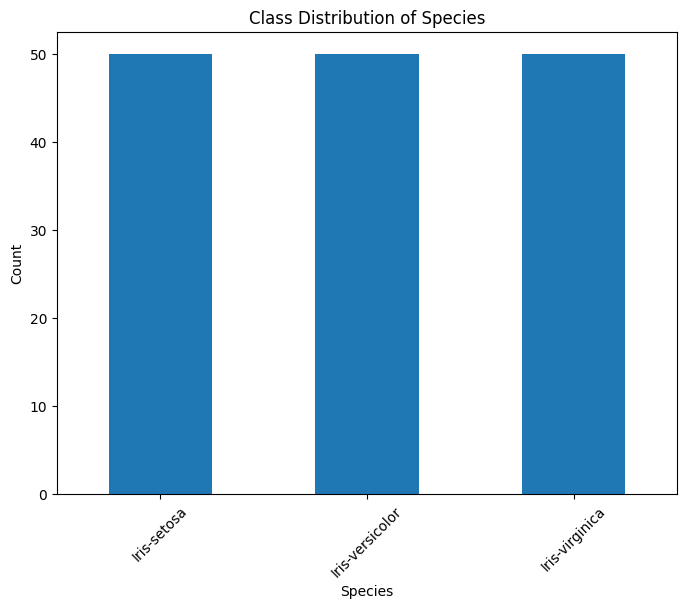


Processed dataset saved to: /content/drive/MyDrive/Machine/Assignment_3/Iris_Processed.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 1. Load the dataset
file_path = '/content/drive/MyDrive/Machine/Assignment_3/Iris.csv'  # Replace with your file path
iris_df = pd.read_csv(file_path)

# 2. Check for missing values and show summary statistics
print("Missing Values in Each Column:")
print(iris_df.isnull().sum())

print("\nDataset Description:")
print(iris_df.describe())

print("\n")
# 3. Visualize the class distribution
species_counts = iris_df['Species'].value_counts()
plt.figure(figsize=(8, 6))
species_counts.plot(kind='bar')
plt.title('Class Distribution of Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 4. Standardize the numeric columns
numeric_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
scaler = StandardScaler()
iris_df[numeric_columns] = scaler.fit_transform(iris_df[numeric_columns])

# 5. Label Encoding for 'Species' column
label_encoder = LabelEncoder()
iris_df['Species'] = label_encoder.fit_transform(iris_df['Species'])

# 6. Save the processed dataset to a new file
output_file_path = '/content/drive/MyDrive/Machine/Assignment_3/Iris_Processed.csv'  # Update your save path
iris_df.to_csv(output_file_path, index=False)

print(f"\nProcessed dataset saved to: {output_file_path}")


# K-Nearest Neighbors (KNN)

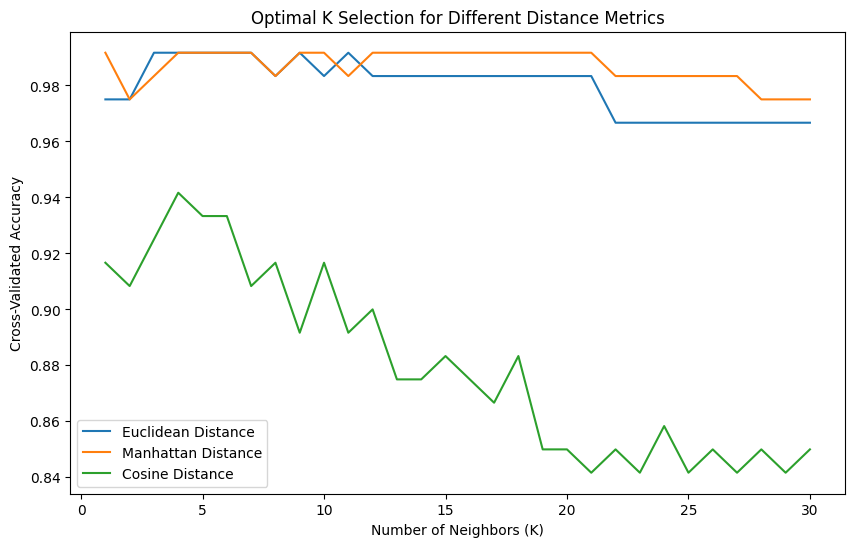


Optimal K values and corresponding cross-validation scores:
Euclidean Distance - Optimal K: 3, Best Score: 0.9917
Manhattan Distance - Optimal K: 1, Best Score: 0.9917
Cosine Distance - Optimal K: 4, Best Score: 0.9417
+-------------------+-------------+--------------------+------------+-------------+----------+------------+-----------+
| Distance Metric   |   Optimal K |   Best CV Accuracy |   Accuracy |   Precision |   Recall |   F1-Score |   ROC-AUC |
+===================+=============+====================+============+=============+==========+============+===========+
| Euclidean         |           3 |           0.991667 |   1        |    1        | 1        |   1        |  1        |
+-------------------+-------------+--------------------+------------+-------------+----------+------------+-----------+
| Manhattan         |           1 |           0.991667 |   1        |    1        | 1        |   1        |  1        |
+-------------------+-------------+--------------------+----

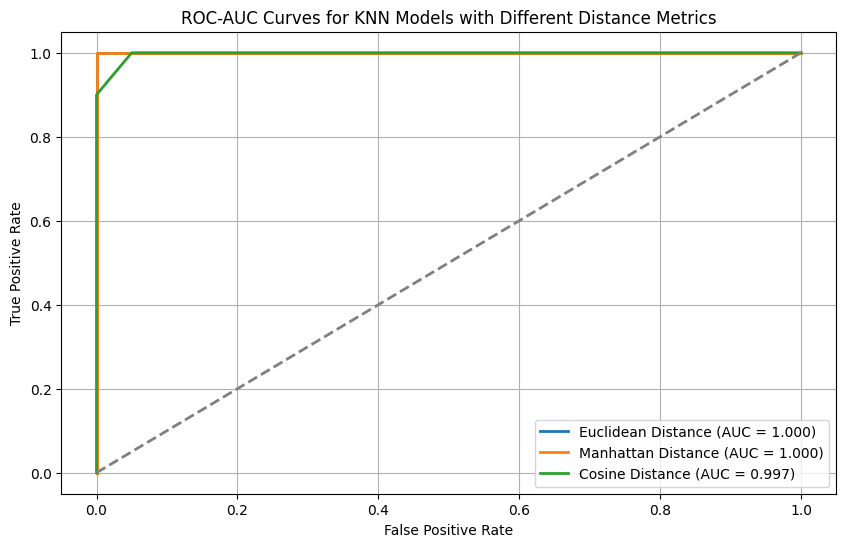

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)
from tabulate import tabulate

%matplotlib inline

# Step 1: Load and Preprocess the Dataset
file_path = "/content/drive/MyDrive/Machine/Assignment_3/Iris_Processed.csv"
data = pd.read_csv(file_path)

# Drop the 'Id' column
data = data.drop(columns=['Id'])

X = data.drop(columns=['Species'])
y = data['Species']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Step 2: Implement KNN with Different Distance Metrics
def evaluate_knn(distance_metric):
    scores = []
    k_range = range(1, 31)

    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)
        cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
        scores.append(np.mean(cv_scores))

    # Plot the results
    plt.plot(k_range, scores, label=f"{distance_metric.capitalize()} Distance")
    plt.xlabel('Number of Neighbors (K)')
    plt.ylabel('Cross-Validated Accuracy')
    plt.title('Optimal K Selection for Different Distance Metrics')
    plt.legend()
    return k_range[np.argmax(scores)], max(scores)

# Evaluate for Euclidean, Manhattan, and Cosine distances
plt.figure(figsize=(10, 6))
metrics = ['euclidean', 'manhattan', 'cosine']
best_k_values = {}
for metric in metrics:
    k_opt, best_score = evaluate_knn(metric)
    best_k_values[metric] = (k_opt, best_score)

plt.show()

print("\nOptimal K values and corresponding cross-validation scores:")
for metric, (k_opt, best_score) in best_k_values.items():
    print(f"{metric.capitalize()} Distance - Optimal K: {k_opt}, Best Score: {best_score:.4f}")

# Step 3: Train and Evaluate KNN Models
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
results = []

for metric, (k_opt, best_score) in best_k_values.items():
    # Train the model
    knn = KNeighborsClassifier(n_neighbors=k_opt, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    y_proba = knn.predict_proba(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test_binarized, y_proba, multi_class='ovr')

    # Append the results as a list
    results.append([metric.capitalize(), k_opt, best_score, accuracy, precision, recall, f1, roc_auc])

# Print the results as a table
headers = ["Distance Metric", "Optimal K", "Best CV Accuracy", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]
print(tabulate(results, headers=headers, tablefmt="grid"))

# Step 4: ROC-AUC Curves for All Distance Metrics
plt.figure(figsize=(10, 6))
for metric, (k_opt, _) in best_k_values.items():
    knn = KNeighborsClassifier(n_neighbors=k_opt, metric=metric)
    knn.fit(X_train, y_train)
    y_proba = knn.predict_proba(X_test)

    # Calculate ROC-AUC Curve
    fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), y_proba.ravel())
    roc_auc = auc(fpr, tpr)

    # Plot the ROC Curve
    plt.plot(fpr, tpr, lw=2, label=f"{metric.capitalize()} Distance (AUC = {roc_auc:.3f})")

# Add a diagonal reference line
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", lw=2)

# Finalize the plot
plt.title("ROC-AUC Curves for KNN Models with Different Distance Metrics")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()


# Logistic Regression


In [ ]:
#logistic reg

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from tabulate import tabulate  # For table formatting

# Load the dataset
file_path = "/content/drive/MyDrive/Machine/Assignment_3/Iris_Processed.csv"
iris = pd.read_csv(file_path)

# Prepare the data
X = iris.drop(columns=['Species'])
y = iris['Species']

# Binarize the test labels only for ROC-AUC computation
y_classes = sorted(y.unique())
y_binarized_test = label_binarize(y_test, classes=y_classes)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train Logistic Regression models
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=200)
log_reg_l1.fit(X_train, y_train)

log_reg_l2 = LogisticRegression(penalty='l2', max_iter=200)
log_reg_l2.fit(X_train, y_train)

# Evaluate performance using classification metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(label_binarize(y_test, classes=sorted(y.unique())),
                            model.predict_proba(X_test), multi_class='ovr')
    return accuracy, precision, recall, f1, roc_auc

# Collect results for all models
results = []
accuracy_l1, precision_l1, recall_l1, f1_l1, roc_auc_l1 = evaluate_model(log_reg_l1, X_test, y_test)
results.append(["L1 Regularization", accuracy_l1, precision_l1, recall_l1, f1_l1, roc_auc_l1])

accuracy_l2, precision_l2, recall_l2, f1_l2, roc_auc_l2 = evaluate_model(log_reg_l2, X_test, y_test)
results.append(["L2 Regularization", accuracy_l2, precision_l2, recall_l2, f1_l2, roc_auc_l2])

# Print results as a table
headers = ["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]
print("\nLogistic Regression Results:")
print(tabulate(results, headers=headers, tablefmt="grid"))

# Plot Micro-Averaged ROC-AUC Curves
plt.figure(figsize=(10, 6))
colors = ['orange', 'green']
models = [("L1 Regularization", log_reg_l1), ("L2 Regularization", log_reg_l2)]

for i, (name, model) in enumerate(models):
    y_proba = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_binarized_test.ravel(), y_proba.ravel())  # Micro-average ROC
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", lw=1.5)

# Finalize plot
plt.title("Micro-Averaged ROC-AUC Curves for Logistic Regression Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()



Logistic Regression Results:
+-------------------+------------+-------------+----------+------------+-----------+
| Model             |   Accuracy |   Precision |   Recall |   F1-Score |   ROC-AUC |
+===================+============+=============+==========+============+===========+
| L1 Regularization |   0.977778 |    0.979365 | 0.977778 |   0.977745 |  0.991987 |
+-------------------+------------+-------------+----------+------------+-----------+
| L2 Regularization |   1        |    1        | 1        |   1        |  1        |
+-------------------+------------+-------------+----------+------------+-----------+


# Support Vector Machines (SVM)



Classification Report for Linear Kernel:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30


Classification Report for Poly Kernel:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Classification Report for Rbf Kernel:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
     

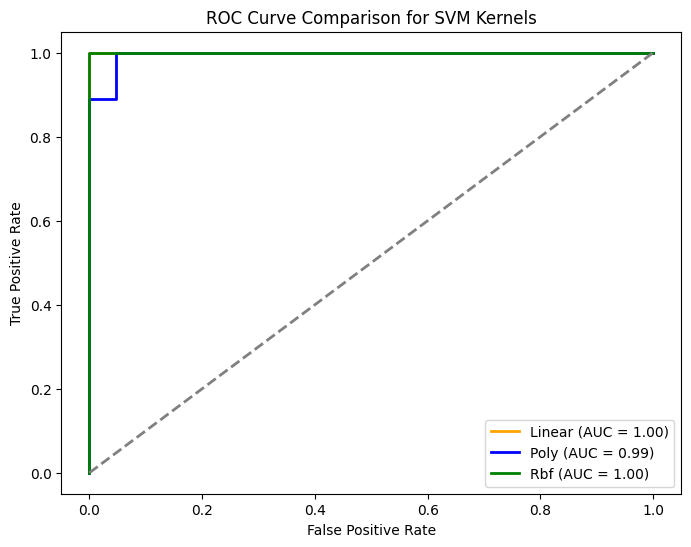


SVM Kernel Comparison Results:
+----------+------------+-------------+----------+------------+-----------+
| Kernel   |   Accuracy |   Precision |   Recall |   F1-Score |   ROC-AUC |
+==========+============+=============+==========+============+===========+
| Linear   |   0.966667 |    0.969444 | 0.966667 |   0.966411 |  1        |
+----------+------------+-------------+----------+------------+-----------+
| Poly     |   0.966667 |    0.97     | 0.966667 |   0.96675  |  0.996641 |
+----------+------------+-------------+----------+------------+-----------+
| Rbf      |   1        |    1        | 1        |   1        |  1        |
+----------+------------+-------------+----------+------------+-----------+


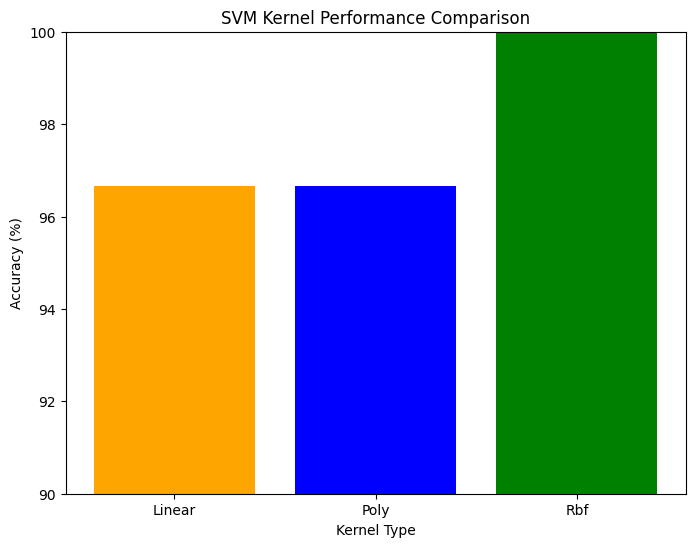

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, roc_curve, auc
)
from tabulate import tabulate

# 1. Load the dataset
file_path = "/content/drive/MyDrive/Machine/Assignment_3/Iris_Processed.csv"  # Replace with your dataset path
iris_df = pd.read_csv(file_path)

# 2. Preprocessing the data
# Drop 'Id' column if unnecessary
iris_df = iris_df.drop(columns=['Id'])


# Standardize the features
X = iris_df.drop(columns=['Species'])
y = iris_df['Species']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train SVM models with Linear, Polynomial, and RBF Kernels
kernels = ['linear', 'poly', 'rbf']
results = {'Kernel': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'ROC-AUC': []}

plt.figure(figsize=(8, 6))
colors = ['orange', 'blue', 'green']

for i, kernel in enumerate(kernels):
    if kernel == 'poly':
        model = SVC(kernel=kernel, degree=3, C=1.0, probability=True, random_state=42)  # Polynomial kernel
    else:
        model = SVC(kernel=kernel, C=1.0, probability=True, random_state=42)  # Linear and RBF kernels

    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')

    # Store the results
    results['Kernel'].append(kernel.capitalize())
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)
    results['ROC-AUC'].append(roc_auc)

    # Print Classification Report
    print(f"\nClassification Report for {kernel.capitalize()} Kernel:\n")
    print(classification_report(y_test, y_pred))

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1], pos_label=1)
    roc_auc_val = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'{kernel.capitalize()} (AUC = {roc_auc_val:.2f})')

# Finalize ROC Curve Plot
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.title('ROC Curve Comparison for SVM Kernels')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# 4. Display Results in a Table Format
results_df = pd.DataFrame(results)
headers = ["Kernel", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]
table = tabulate(results_df, headers=headers, tablefmt="grid", showindex=False)

print("\nSVM Kernel Comparison Results:")
print(table)


# 5. Plot Kernel Performance Comparison
plt.figure(figsize=(8, 6))
plt.bar(results_df['Kernel'], results_df['Accuracy'] * 100, color=colors)
plt.title('SVM Kernel Performance Comparison')
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy (%)')
plt.ylim(90, 100)
plt.show()


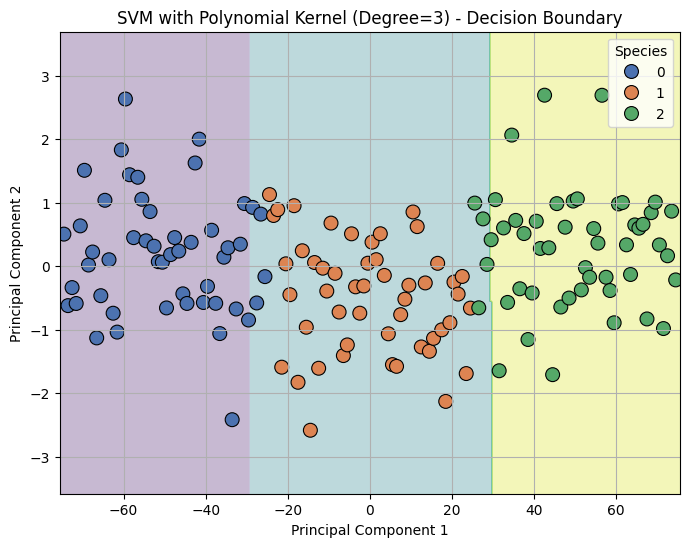

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import seaborn as sns

# Step 1: Reduce features to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 2: Train the Polynomial SVM on the reduced dataset
svm_poly = SVC(kernel='poly', degree=3, C=1.0)
svm_poly.fit(X_pca, y)

# Step 3: Create a meshgrid for plotting the decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

# Predict for meshgrid points
Z = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 4: Plot the decision boundary and data points
plt.figure(figsize=(8, 6))

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Plot the data points
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=y, palette='deep', s=100, edgecolor='k'
)

# Add labels and titles
plt.title("SVM with Polynomial Kernel (Degree=3) - Decision Boundary")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Species")
plt.grid()
plt.show()


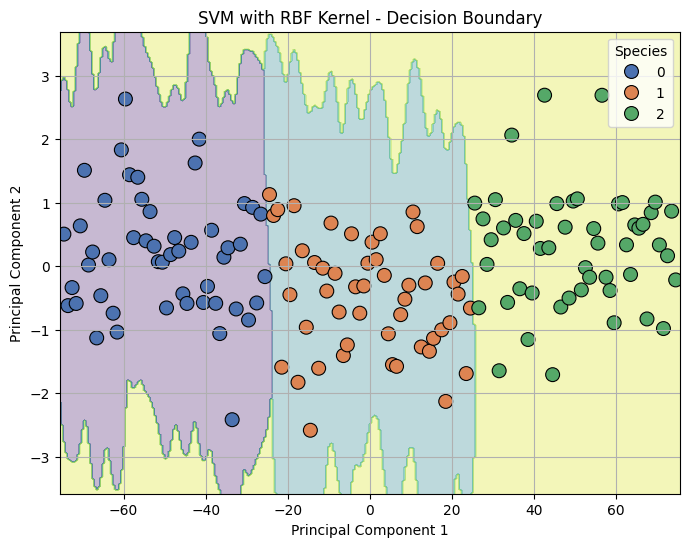

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import seaborn as sns

# Step 1: Reduce features to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 2: Train the RBF SVM on the reduced dataset
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='auto')
svm_rbf.fit(X_pca, y)

# Step 3: Create a meshgrid for plotting the decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

# Predict for meshgrid points
Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 4: Plot the decision boundary and data points
plt.figure(figsize=(8, 6))

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Plot the data points
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=y, palette='deep', s=100, edgecolor='k'
)

# Add labels and titles
plt.title("SVM with RBF Kernel - Decision Boundary")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Species")
plt.grid()
plt.show()


# Ensemble Methods

In [ ]:
pip install matplotlib scikit-learn pandas



Ensemble Method Results:
+---------------+------------+-------------+----------+------------+-----------+
| Model         |   Accuracy |   Precision |   Recall |   F1-Score |   ROC-AUC |
+===============+============+=============+==========+============+===========+
| AdaBoost      |          1 |           1 |        1 |          1 |         1 |
+---------------+------------+-------------+----------+------------+-----------+
| Random Forest |          1 |           1 |        1 |          1 |         1 |
+---------------+------------+-------------+----------+------------+-----------+


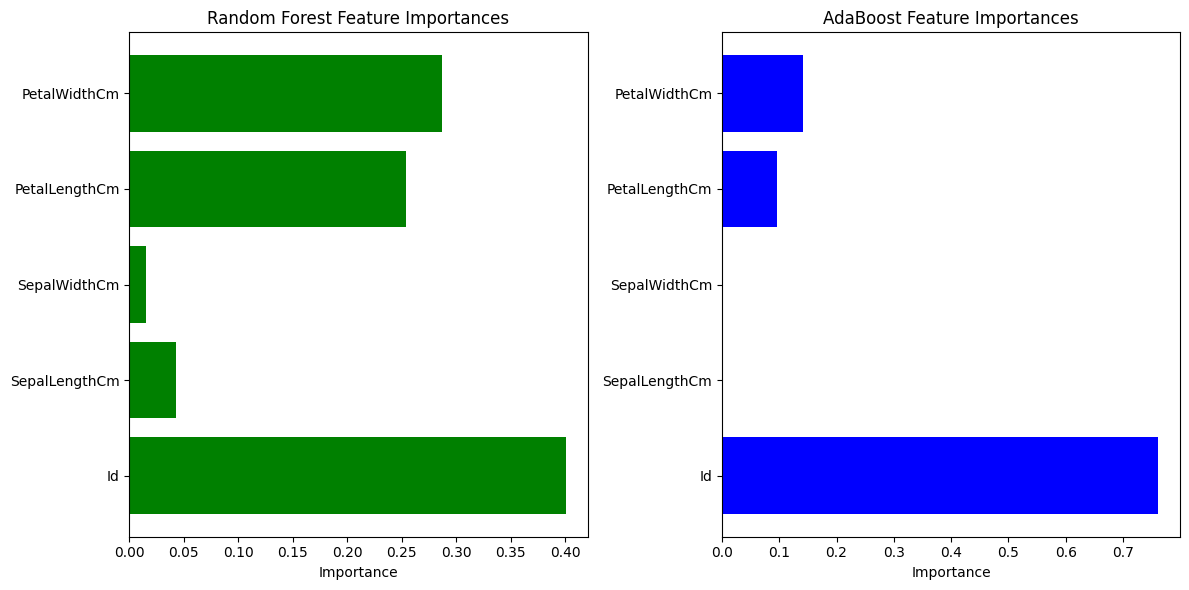

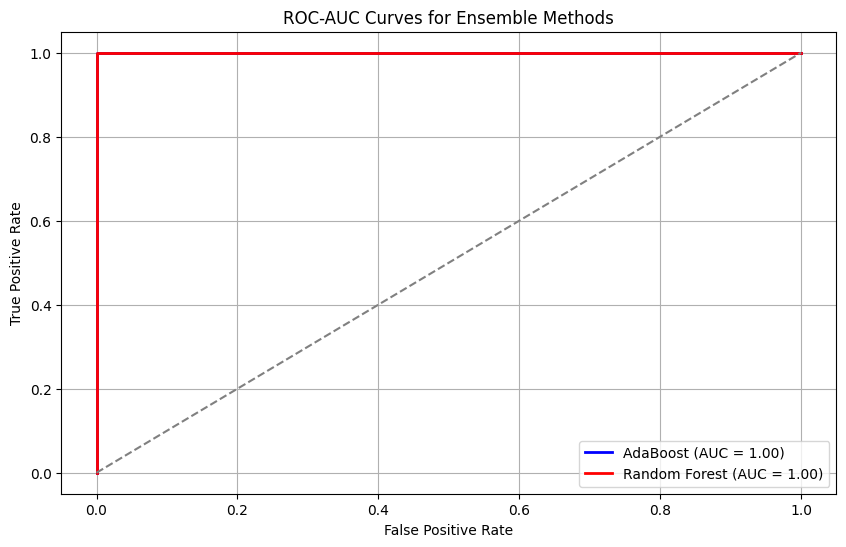

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate  # For table formatting

# File path for the dataset
file_path = "/content/drive/MyDrive/Machine/Assignment_3/Iris_Processed.csv"

# Load the dataset
iris = pd.read_csv(file_path)

# Prepare the data
X = iris.drop(columns=['Species'])
y = iris['Species']

# Binarize the labels for ROC-AUC computation
y_classes = sorted(y.unique())

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train AdaBoost model
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)

# Train Random Forest model (Bagging)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Define a function to evaluate ensemble models
def evaluate_ensemble_model(model, X_test, y_test, y_classes):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(label_binarize(y_test, classes=y_classes), y_proba, multi_class='ovr')

    return accuracy, precision, recall, f1, roc_auc

# Evaluate AdaBoost
adaboost_metrics = evaluate_ensemble_model(adaboost, X_test, y_test, y_classes)

# Evaluate Random Forest
rf_metrics = evaluate_ensemble_model(random_forest, X_test, y_test, y_classes)

# Compile results into a table for printing
ensemble_results = [
    ["AdaBoost", *adaboost_metrics],
    ["Random Forest", *rf_metrics]
]

# Print results using tabulate
ensemble_headers = ["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]
print("\nEnsemble Method Results:")
print(tabulate(ensemble_results, headers=ensemble_headers, tablefmt="grid"))

# 1. Feature Importances
plt.figure(figsize=(12, 6))
feature_importances_rf = random_forest.feature_importances_
feature_importances_ab = adaboost.feature_importances_

# Plot Random Forest Feature Importances
plt.subplot(1, 2, 1)
plt.barh(X.columns, feature_importances_rf, color='green')
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance")

# Plot AdaBoost Feature Importances
plt.subplot(1, 2, 2)
plt.barh(X.columns, feature_importances_ab, color='blue')
plt.title("AdaBoost Feature Importances")
plt.xlabel("Importance")

plt.tight_layout()
plt.show()

# 2. ROC-AUC Curves
plt.figure(figsize=(10, 6))
models = [("AdaBoost", adaboost), ("Random Forest", random_forest)]
colors = ['blue', 'red']

for i, (name, model) in enumerate(models):
    y_proba = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(label_binarize(y_test, classes=y_classes).ravel(), y_proba.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", lw=1.5)

# Finalize plot
plt.title("ROC-AUC Curves for Ensemble Methods")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()



## Bias-Variance Tradeoff for AdaBoost and Random Forest

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

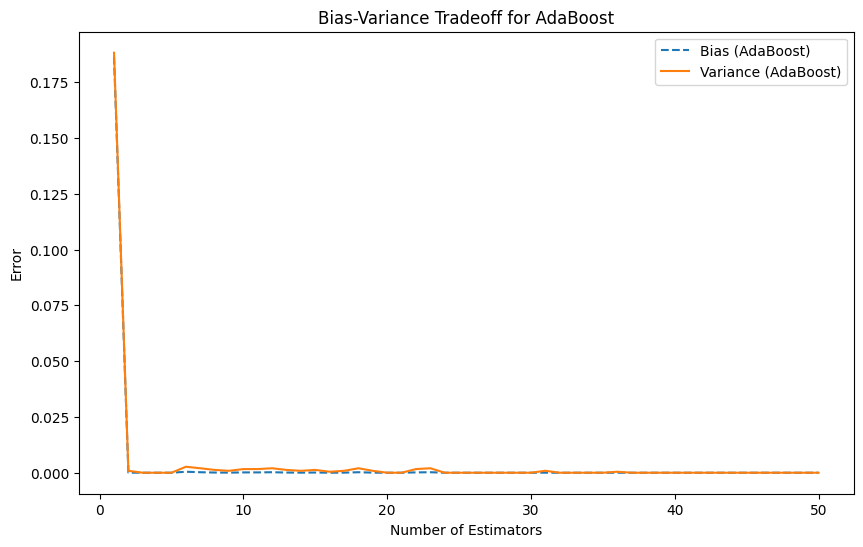

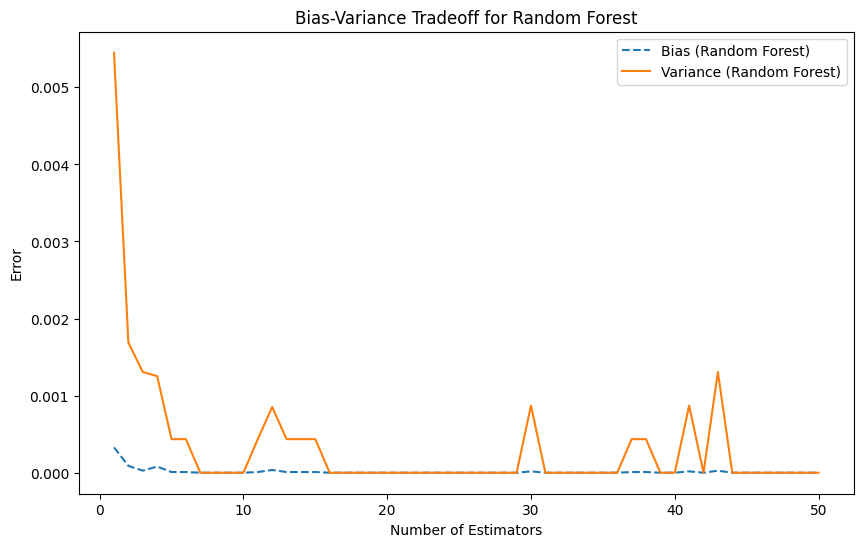

In [ ]:
from sklearn.utils import resample

# Function to calculate bias and variance
def bias_variance_decomposition(model, X_train, y_train, X_test, y_test, n_iterations=50):
    predictions = []
    for _ in range(n_iterations):
        # Bootstrap sampling
        X_boot, y_boot = resample(X_train, y_train)
        model.fit(X_boot, y_boot)
        predictions.append(model.predict(X_test))

    # Convert predictions to a numpy array for analysis
    predictions = np.array(predictions)
    avg_predictions = np.mean(predictions, axis=0)

    # Bias: Squared difference between true values and average predictions
    bias = np.mean((y_test - avg_predictions) ** 2)

    # Variance: Average squared deviation of predictions from the average prediction
    variance = np.mean(np.var(predictions, axis=0))

    return bias, variance

# Calculate Bias and Variance for AdaBoost and Random Forest
bias_ada, var_ada = [], []
bias_rf, var_rf = [], []

# Varying the number of estimators to see the trend
n_estimators_range = range(1, 51)

for n in n_estimators_range:
    # AdaBoost
    ada_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=n, random_state=42)
    b, v = bias_variance_decomposition(ada_model, X_train, y_train, X_test, y_test)
    bias_ada.append(b)
    var_ada.append(v)

    # Random Forest
    rf_model = RandomForestClassifier(n_estimators=n, max_features='sqrt', random_state=42)
    b, v = bias_variance_decomposition(rf_model, X_train, y_train, X_test, y_test)
    bias_rf.append(b)
    var_rf.append(v)

# Plot Bias and Variance for AdaBoost
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, bias_ada, label='Bias (AdaBoost)', linestyle='--')
plt.plot(n_estimators_range, var_ada, label='Variance (AdaBoost)', linestyle='-')
plt.title('Bias-Variance Tradeoff for AdaBoost')
plt.xlabel('Number of Estimators')
plt.ylabel('Error')
plt.legend()
plt.show()

# Plot Bias and Variance for Random Forest
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, bias_rf, label='Bias (Random Forest)', linestyle='--')
plt.plot(n_estimators_range, var_rf, label='Variance (Random Forest)', linestyle='-')
plt.title('Bias-Variance Tradeoff for Random Forest')
plt.xlabel('Number of Estimators')
plt.ylabel('Error')
plt.legend()
plt.show()


### Bias-Variance Result

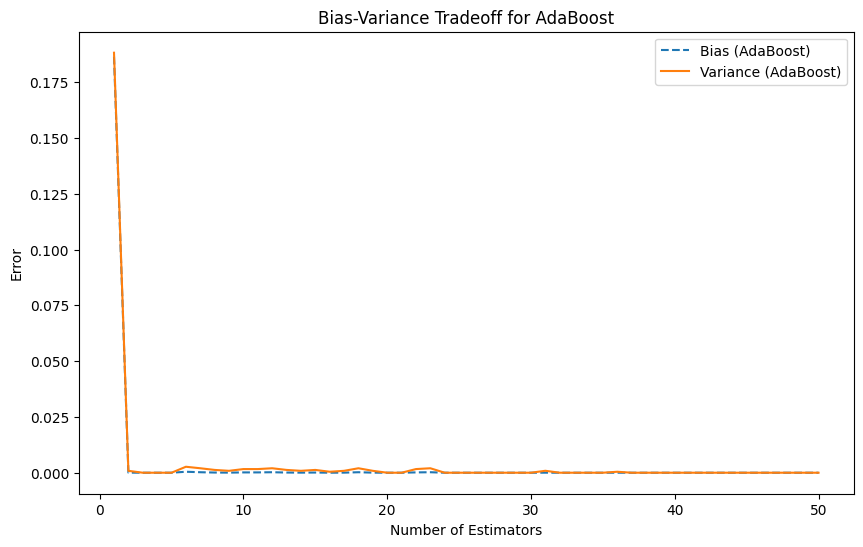


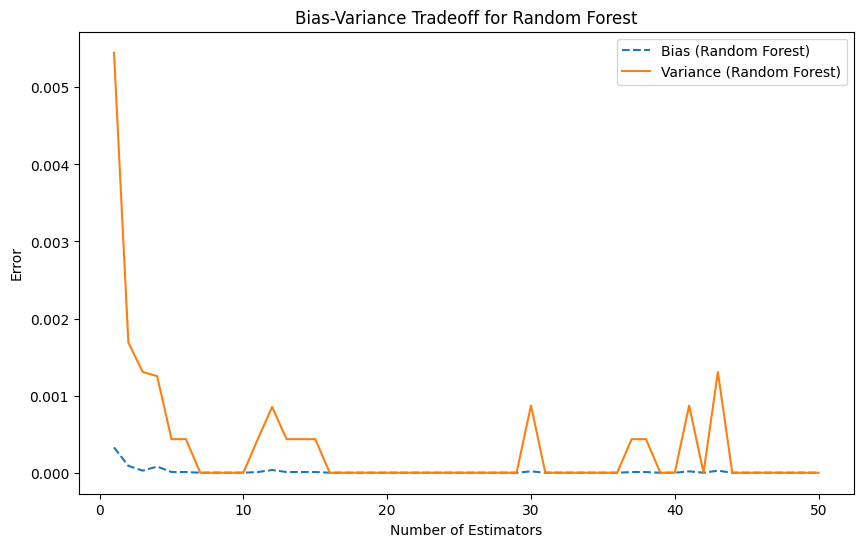